In [2]:
# Gives the discrete, linear convolution of two one-dimensional sequences.
# some goodies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import convolutionF as F
from scipy.stats import norm

In [3]:
x = np.arange(-50, 50, 1./3)
dx = x[1]-x[0]

In [4]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

/home/fi0/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<function matplotlib.pyplot.show>

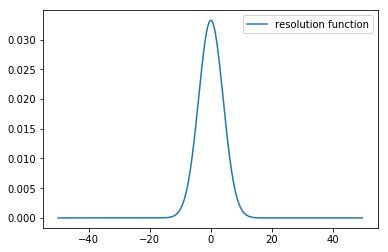

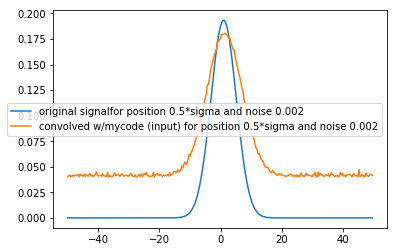

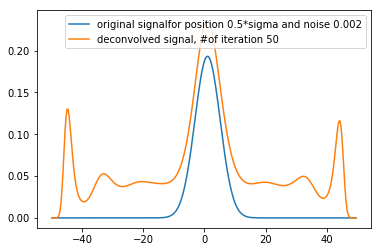

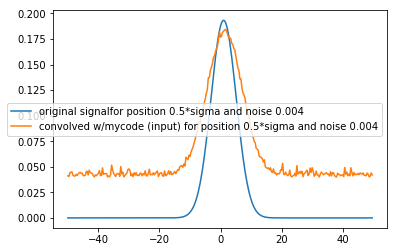

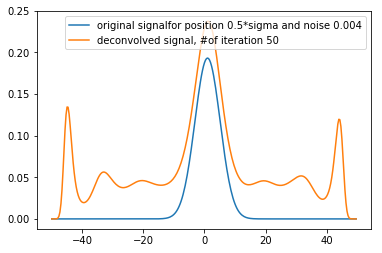

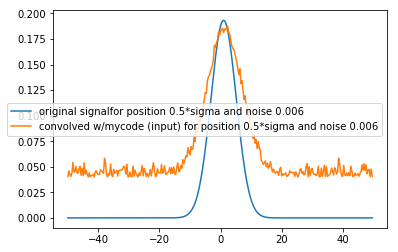

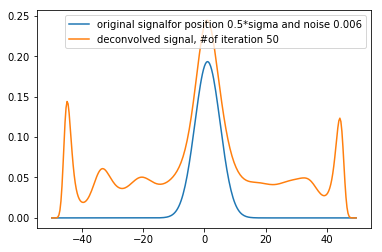

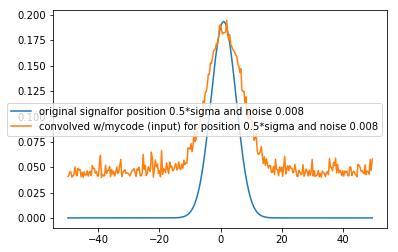

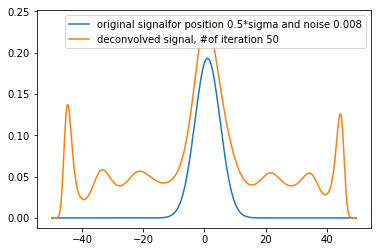

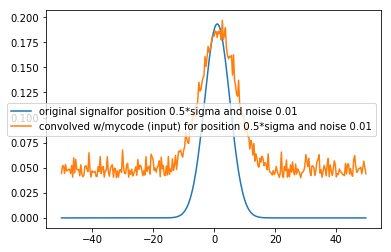

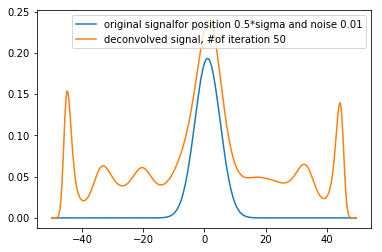

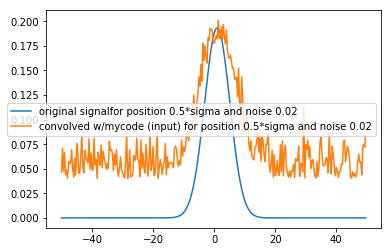

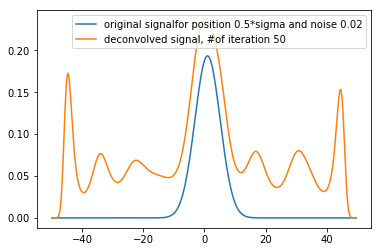

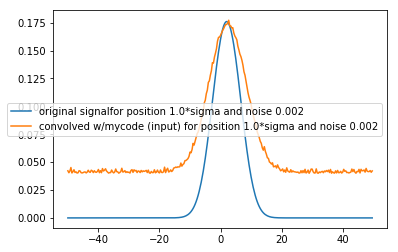

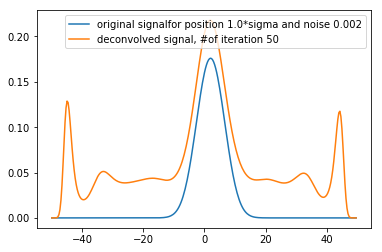

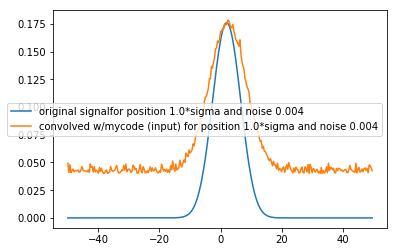

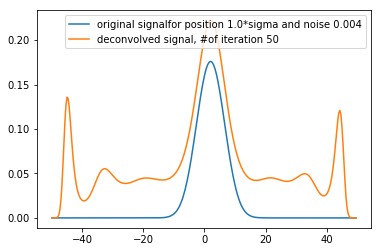

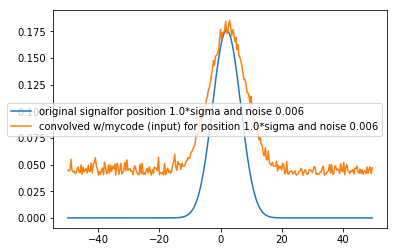

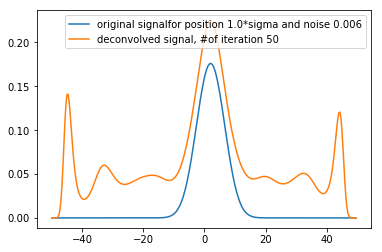

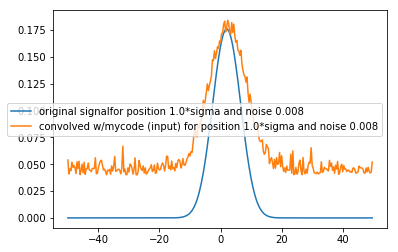

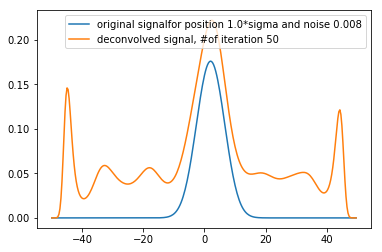

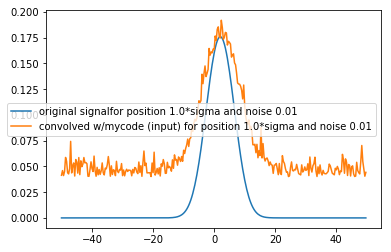

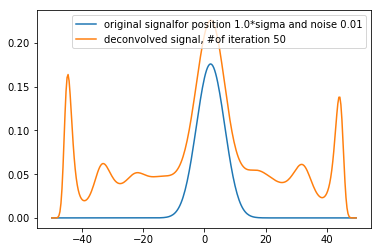

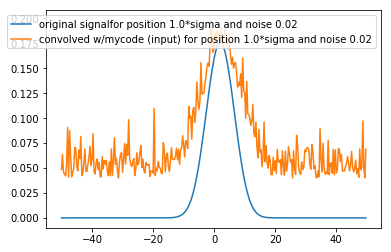

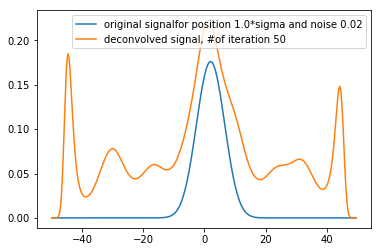

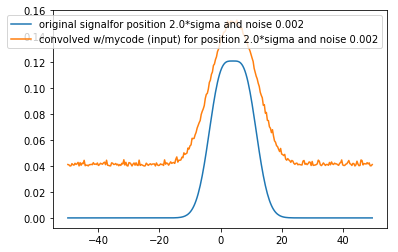

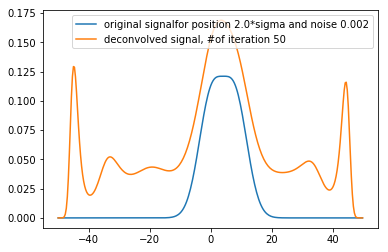

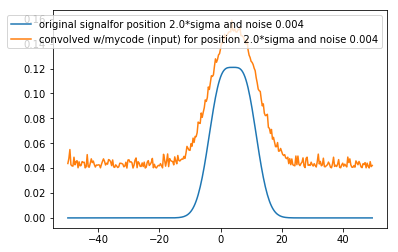

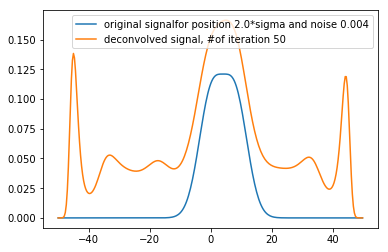

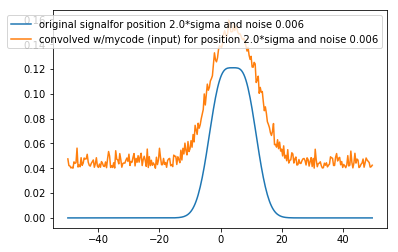

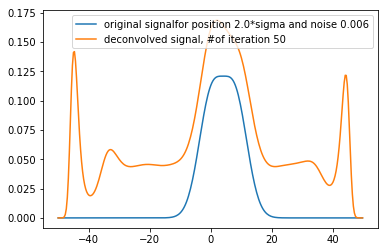

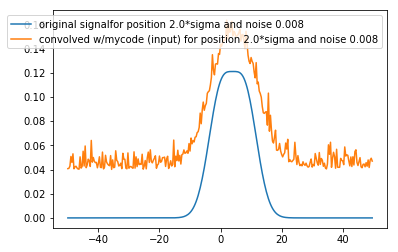

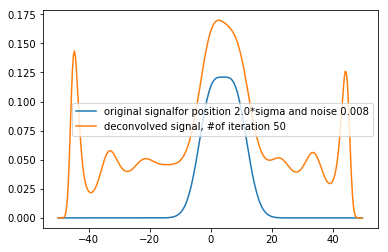

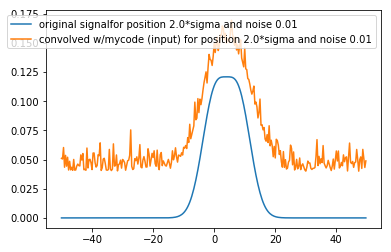

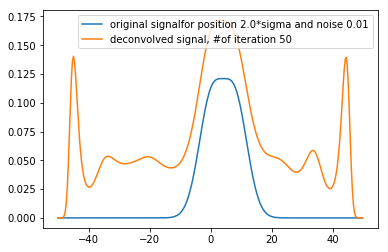

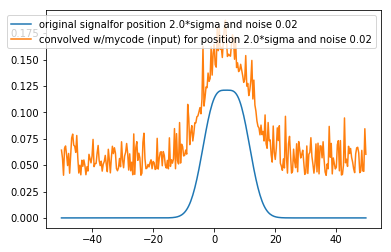

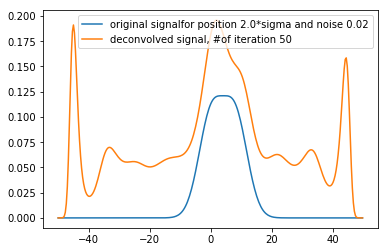

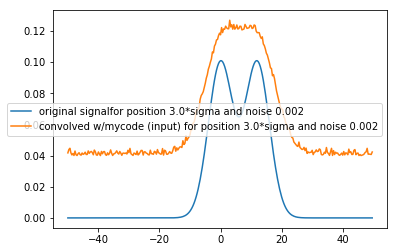

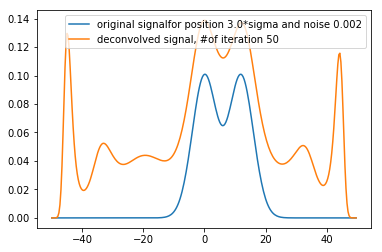

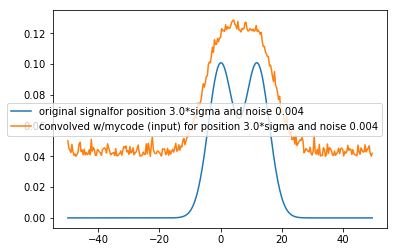

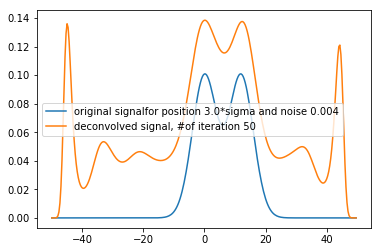

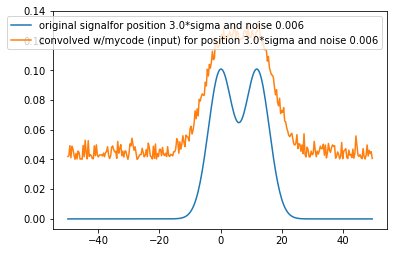

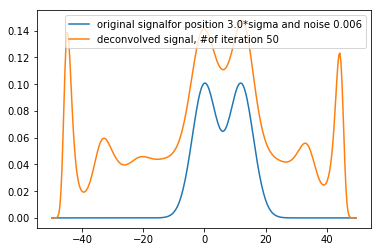

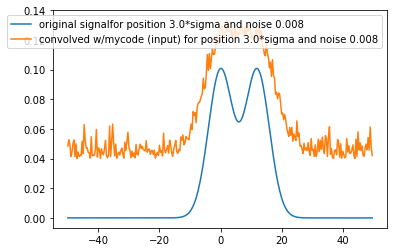

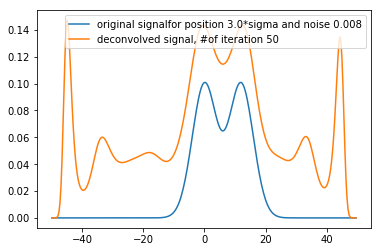

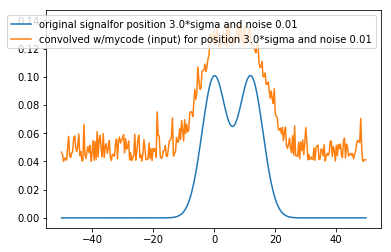

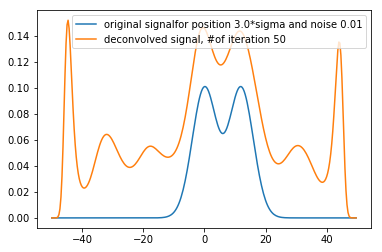

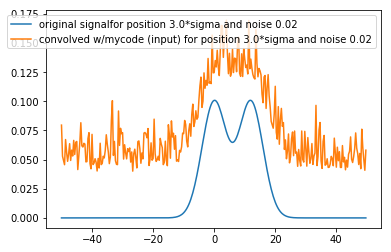

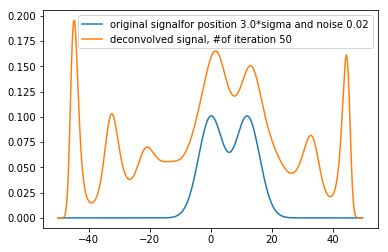

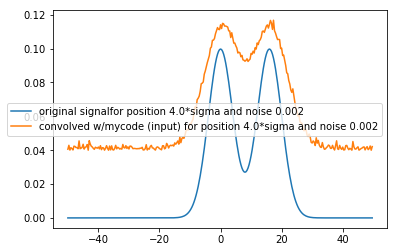

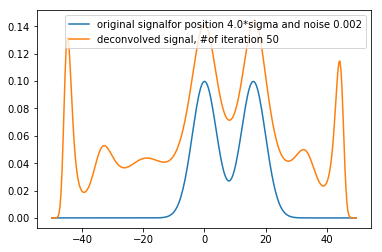

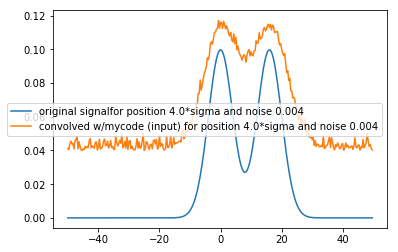

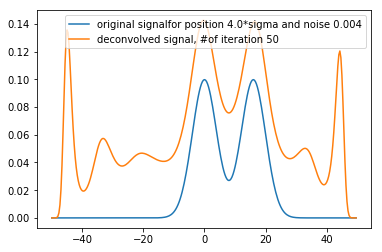

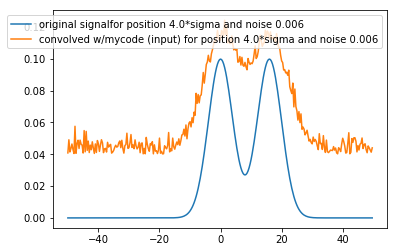

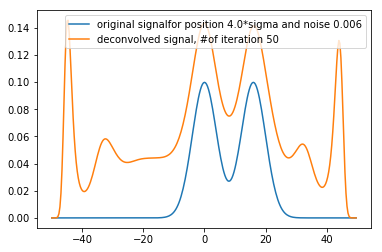

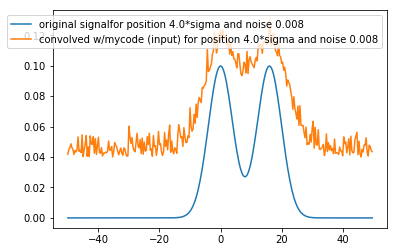

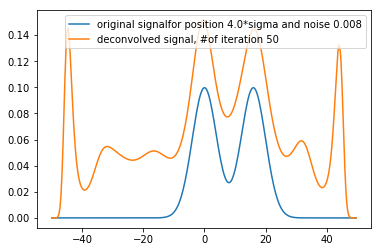

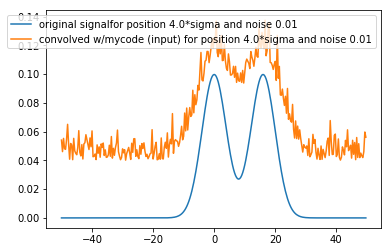

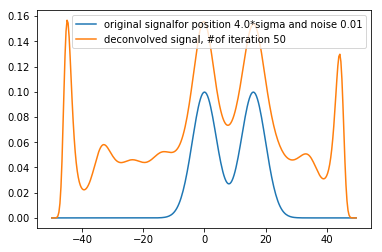

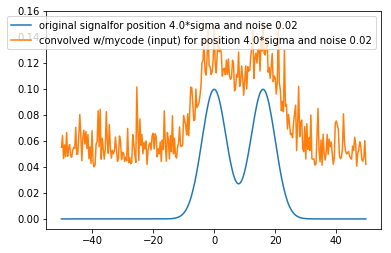

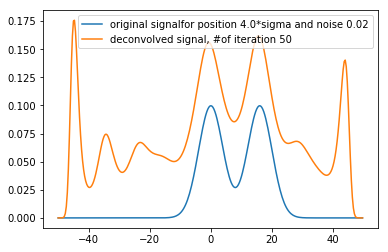

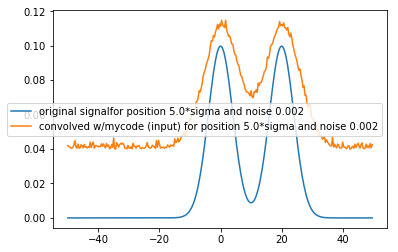

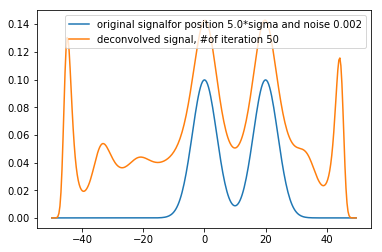

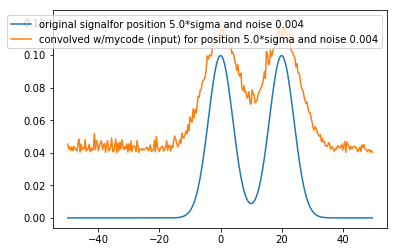

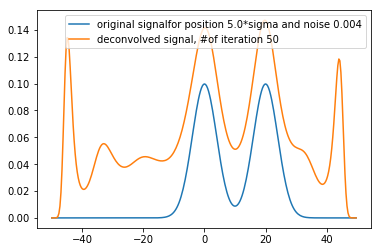

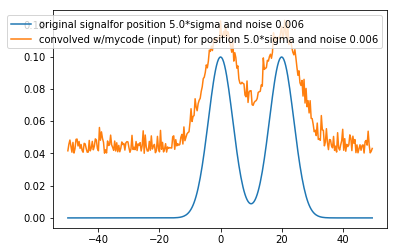

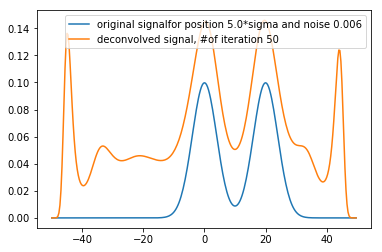

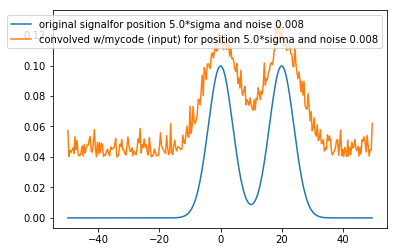

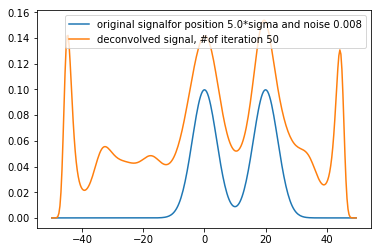

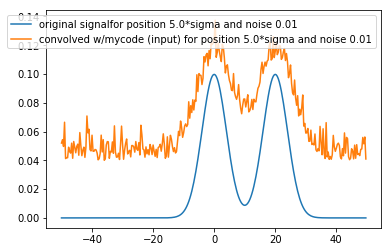

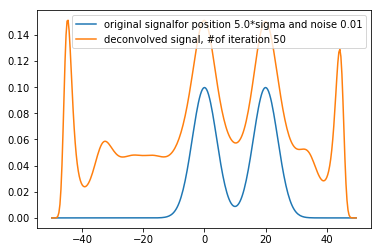

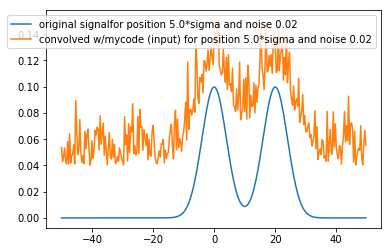

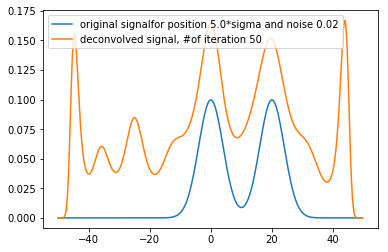

In [5]:
position=[0.5, 1., 2., 3., 4., 5.]

sig=0*np.ones(len(x))
RF=gauss(x, 1., 0., 4)*dx
plt.figure() #plot the resolution function
plt.plot(x,RF,label='resolution function')
plt.legend()
S_=0*np.ones(len(x))

for p in position:
    sigma=4.
    bkg=0.04
    sig=gauss(x, 1., 0., 4.) + gauss(x, 1., p*sigma, 4) 
    S_=F.convolve(sig,RF,'same') #convolved signal 
   
    
    # Adding noise to the convolved signal (input)
    noise=[0.002 ,0.004, 0.006, 0.008, 0.01, 0.02]
    S=0.0* np.ones(len(x))
    S_sum=0.0
    ini=0.0 * np.ones(len(S))#initial guess
    I=0.0 * np.ones(len(S))  #deconvolved signal  
    for n in noise:
        S=S_+ np.abs(n * np.random.normal(size=len(x)))+ bkg
        S_sum=np.sum(S,0) #summation of the convolved signal
        ini=S_sum/len(S) * np.ones(len(S))#initial guess
        plt.figure() #plot the convolved w/noise
        plt.plot(x,sig, label='original signalfor position {}*sigma and noise {}'.format(p,n))
        plt.plot(x,S, label='convolved w/mycode (input) for position {}*sigma and noise {}'.format(p,n))
        plt.legend()
        g='same'
        no_iteration=50
        I=F.deconvolve(S,RF,ini,g,'iteration',no_iteration)  #deconvolved signal  
        plt.figure() #plot the deconvolved signal with original signal
        plt.plot(x,sig, label='original signalfor position {}*sigma and noise {}'.format(p,n))
        plt.plot(x,I,label='deconvolved signal, #of iteration {}'.format(no_iteration))
        plt.legend()
plt.show 
